# Topic: 'What Do You Know'
# problem statement:Improve the state of art in the student evaluation by predicting whether a student will answer the next test question correctly .
# Team Members: 
#             Shreyas Joshi              301       
#           Sphoorti Kulkarni          310
#            Sumaiya Garag              317
#            Sunidhi P Naik             318




# First all the libraries provided by ananconda which will be useful for the work are imported . 
# As the work progresses further , the needed libraries are imported accordingly .

In [1]:
import numpy as np
import pandas as pd

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [ ]:
#After importing the libraries , the first thing to do is to is to read the needed file(s) for the prediction ,
#into variable(s)
#For our predcition , we need two files train data (valid_training.csv) and test data (valid_test.csv) . 

In [3]:
#load train data
train_users = pd.read_csv('valid_training.csv',nrows=1000000, dtype={'correct':np.uint8,'user_id':np.uint16,'answer_id':np.uint16,
                    'track_name':np.uint32,'outcome':np.uint8})

In [4]:
train_users.head()

,correct,outcome,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,round_started_at,answered_at,deactivated_at,answer_id,game_type,num_players,date_of_test,question_set_id
0,0,2,20282,5560,0,1,5,14,222 233 240 246,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,6540,7,1,NaN,1567
1,1,1,20282,4681,0,1,5,0,24 49,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,4742,7,1,NaN,1227
2,1,1,20282,1529,0,1,5,0,31 49,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,4309,7,1,NaN,1148
3,1,1,20282,2908,0,1,5,0,31 49,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,4408,7,1,NaN,1168
4,1,1,20282,1773,0,1,5,11,183 194 207,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,10822,7,1,NaN,2318


In [ ]:
##train_users['outcome'] = train_users[train_users['outcome'] < 3]

In [ ]:
train_users

In [ ]:
#Now that data is loaded , checking the amount of null values in each attribute is the next thing . 
#This is a part of data cleaning

In [5]:

## How much data we are missing?                
## Compute NaN percentage of each feature.
users_nan = (train_users.isnull().sum() / train_users.shape[0]) * 100
users_nan[users_nan > 0]                                                        

answered_at       11.1711
deactivated_at     0.0015
date_of_test      80.1637
dtype: float64

In [ ]:
# Now we have the cloumns in which null values are present and wat is the percentage of null values in them .
# By general concepts , the attributes with null percentage of above 60% can be dropped .
# It can be dropped because if the null percetage is big , deleteing that attribute will not make much difference
# in the dataset . 
# Hence we are dropping date_of_test attribute .

In [6]:
#drop date_of_test 
train_users.drop('date_of_test',axis=1, inplace=True)

train_users.head()

,correct,outcome,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,round_started_at,answered_at,deactivated_at,answer_id,game_type,num_players,question_set_id
0,0,2,20282,5560,0,1,5,14,222 233 240 246,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,6540,7,1,1567
1,1,1,20282,4681,0,1,5,0,24 49,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,4742,7,1,1227
2,1,1,20282,1529,0,1,5,0,31 49,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,4309,7,1,1148
3,1,1,20282,2908,0,1,5,0,31 49,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,4408,7,1,1168
4,1,1,20282,1773,0,1,5,11,183 194 207,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,10822,7,1,2318


In [ ]:
#fill during post processing
#train_users['answered_at'].fillna('0000-00-00', inplace=True)

In [ ]:
#train_users['deactivated_at'].fillna('0000-00-00', inplace=True)

In [ ]:
# Our data has the fields round_started_at , answered_at , deactivated_at . 
# All these three attributes have date and time .
# Since we have droppeddat_of_test , we are going to split the each of the three attributes into two , where each
# one eparated part containd the date and the other , time .
# all the date columns generated are same . Hence there is redundent data .
# So we will drop two of the date columns and rename the others .

Split datetime to separate date and time attributes

In [7]:
train_users['round_started_at'] = pd.to_datetime(train_users['round_started_at'],  errors='coerce')
print("Adding new fields...")
train_users['round_started_at_date'] = train_users['round_started_at'].dt.date
train_users['round_started_at_time'] = train_users['round_started_at'].dt.time
print("Adding new fields...completed")

train_users.drop('round_started_at',axis=1, inplace=True)

Adding new fields...
Adding new fields...completed


In [8]:
train_users['answered_at'] = pd.to_datetime(train_users['answered_at'],  errors='coerce')
print("Adding new fields...")
train_users['answered_at_date'] = train_users['answered_at'].dt.date
train_users['answered_at_time'] = train_users['answered_at'].dt.time
print("Adding new fields...completed")

train_users.drop('answered_at',axis=1, inplace=True)


Adding new fields...
Adding new fields...completed


In [9]:
train_users['deactivated_at'] = pd.to_datetime(train_users['deactivated_at'],  errors='coerce')
print("Adding new fields...")
train_users['deactivated_at_date'] = train_users['deactivated_at'].dt.date
train_users['deactivated_at_time'] = train_users['deactivated_at'].dt.time
print("Adding new fields...completed")

train_users.drop('deactivated_at',axis=1, inplace=True)


Adding new fields...
Adding new fields...completed


In [10]:
#check datatypes
train_users.dtypes

correct                   uint8
outcome                   uint8
user_id                  uint16
question_id               int64
question_type             int64
group_name                int64
track_name               uint32
subtrack_name             int64
tag_string               object
answer_id                uint16
game_type                 int64
num_players               int64
question_set_id           int64
round_started_at_date    object
round_started_at_time    object
answered_at_date         object
answered_at_time         object
deactivated_at_date      object
deactivated_at_time      object
dtype: object

In [ ]:
train_users.head()

In [ ]:
# we need the newly generated columns to be in a specific format.
# the round_started_at_date , round_started_at_time , answered_at_time , answered_at_date , 
# deactivated_at_time , deactivated_at_date are in object format .
# for our model we need them to be in timestamp format .
# Hence the format conversion is done .

In [11]:
#to datetime format
train_users['round_started_at_date'] = pd.to_datetime(train_users['round_started_at_date'], format='%Y-%m-%d')

train_users['round_started_at_time'] = pd.to_datetime(train_users['round_started_at_time'], format='%H:%M:%S')

train_users['answered_at_date'] = pd.to_datetime(train_users['round_started_at_date'], format='%Y-%m-%d')

train_users['answered_at_time'] = pd.to_datetime(train_users['answered_at_time'], format='%H:%M:%S')

train_users['deactivated_at_date'] = pd.to_datetime(train_users['deactivated_at_date'], format='%Y-%m-%d')

train_users['deactivated_at_time'] = pd.to_datetime(train_users['round_started_at_time'], format='%H:%M:%S')

In [12]:
#label encoding of date, time and tag_string attributes
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_users['round_started_at_date'] = le.fit_transform(train_users['round_started_at_date'])
train_users['answered_at_date'] = le.fit_transform(train_users['answered_at_date'])
train_users['deactivated_at_date'] = le.fit_transform(train_users['deactivated_at_date'])
train_users['round_started_at_time'] = le.fit_transform(train_users['round_started_at_time'])
train_users['answered_at_time'] = le.fit_transform(train_users['answered_at_time'])
train_users['deactivated_at_time'] = le.fit_transform(train_users['deactivated_at_time'])
#train_users['date_of_test'] = le.fit_transform(train_users['date_of_test'])
train_users['tag_string'] = le.fit_transform(train_users['tag_string'])
#train_users['time_taken'] = le.fit_transform(train_users['time_taken'])
train_users.head()

/home/sphoorti/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:279: FutureWarning: In the future, NAT != NAT will be True rather than False.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


,correct,outcome,user_id,question_id,question_type,group_name,track_name,subtrack_name,tag_string,answer_id,game_type,num_players,question_set_id,round_started_at_date,round_started_at_time,answered_at_date,answered_at_time,deactivated_at_date,deactivated_at_time
0,0,2,20282,5560,0,1,5,14,1060,6540,7,1,1567,688,73019,688,73065,688,73019
1,1,1,20282,4681,0,1,5,0,1221,4742,7,1,1227,688,73138,688,73201,688,73138
2,1,1,20282,1529,0,1,5,0,1272,4309,7,1,1148,688,73228,688,73283,688,73228
3,1,1,20282,2908,0,1,5,0,1272,4408,7,1,1168,688,73309,688,73352,688,73309
4,1,1,20282,1773,0,1,5,11,801,10822,7,1,2318,688,73377,688,73535,688,73377


In [ ]:
train_users.head()

# feature selection

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [14]:
#for selecting attributes
y = train_users['outcome']
#x = train_users[['correct','tag_string','subtrack_name','user_id']]
x = train_users.drop('outcome',axis=1, inplace=False)

In [15]:

from sklearn import cross_validation
## Spliting of training dataset into 80% training data and 20% testing data randomly
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(x, y , test_size=0.2, random_state=42)

/home/sphoorti/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:

# Now that we have our data clean and transformed to our suitable form, we now predict the necessary features 
# required for predicting the desired attribute's value (atribute : outcome)
# We have used ensembles to find the important attributes . 
# ensembles can be shown to have more flexibility in the functions they can represent . 
# this feature of ensemble allowed us to use ensemble as a feature selector .


In [16]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
# load data
# feature extraction
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

[ 0.70656498  0.00338748  0.00227329  0.00232035  0.0027363   0.00847598
  0.0029619   0.00412972  0.0848564   0.0025671   0.00232093  0.00660038
  0.00362583  0.01206047  0.00389289  0.12259883  0.00359215  0.02503503]


In [17]:
m=model.feature_importances_

m.mean()

0.055555555555555552

In [18]:
import matplotlib.pyplot as plt

In [19]:
indices = np.argsort(m)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], m[indices[f]]))

Feature ranking:
1. feature 0 (0.706565)
2. feature 15 (0.122599)
3. feature 8 (0.084856)
4. feature 17 (0.025035)
5. feature 13 (0.012060)
6. feature 5 (0.008476)
7. feature 11 (0.006600)
8. feature 7 (0.004130)
9. feature 14 (0.003893)
10. feature 12 (0.003626)
11. feature 16 (0.003592)
12. feature 1 (0.003387)
13. feature 6 (0.002962)
14. feature 4 (0.002736)
15. feature 9 (0.002567)
16. feature 10 (0.002321)
17. feature 3 (0.002320)
18. feature 2 (0.002273)


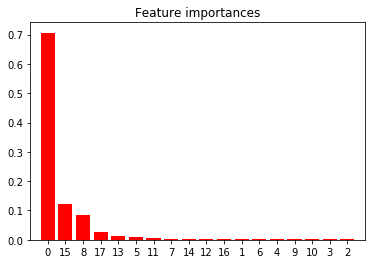

In [20]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), m[indices],
       color="r", align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

# Models


# 1. GNB

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Different classification techniques
## Decision Tree 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree

In [22]:
#for selecting attributes
y_new = train_users['outcome']
#x = train_users[['correct','tag_string','subtrack_name','user_id']]
x_new = train_users[['correct','tag_string','answered_at_date']]


from sklearn import cross_validation
## Spliting of training dataset into 80% training data and 20% testing data randomly
X_train1, X_test1, Y_train1, Y_test1 = cross_validation.train_test_split(x_new, y_new , test_size=0.2, random_state=42)

In [23]:
## Spliting of training dataset into 80% training data and 20% testing data randomly
X_trainVal, X_testVal, Y_trainVal, Y_testVal = cross_validation.train_test_split(X_train1, Y_train1 , test_size=0.25, random_state=42)

In [24]:
#KNN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score

In [25]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X_train1)
distances, indices = nbrs.kneighbors(X_train1)
nbrs.fit(X_train1, Y_train1)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=2, p=2, radius=1.0)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#accuracy for train split
for K in range(20):
 K_value =K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train1, Y_train1) 
 y_pred = neigh.predict(X_test1)
 print( "Accuracy is ", accuracy_score(Y_test1,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  72.151 % for K-Value: 1
Accuracy is  72.2405 % for K-Value: 2
Accuracy is  70.0145 % for K-Value: 3
Accuracy is  69.9415 % for K-Value: 4
Accuracy is  68.9065 % for K-Value: 5
Accuracy is  68.3215 % for K-Value: 6
Accuracy is  67.8055 % for K-Value: 7
Accuracy is  67.4565 % for K-Value: 8
Accuracy is  66.8625 % for K-Value: 9
Accuracy is  66.5825 % for K-Value: 10
Accuracy is  66.145 % for K-Value: 11
Accuracy is  65.7475 % for K-Value: 12
Accuracy is  65.5015 % for K-Value: 13
Accuracy is  65.285 % for K-Value: 14
Accuracy is  64.929 % for K-Value: 15
Accuracy is  64.7615 % for K-Value: 16
Accuracy is  64.4735 % for K-Value: 17
Accuracy is  64.257 % for K-Value: 18
Accuracy is  63.953 % for K-Value: 19
Accuracy is  63.7575 % for K-Value: 20


In [39]:
#accuracy for valid data
for K in range(20):
 K_value =K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_trainVal, Y_trainVal) 
 y_pred = neigh.predict(X_testVal)
 print( "Accuracy is ", accuracy_score(Y_testVal,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  69.8155 % for K-Value: 1
Accuracy is  70.063 % for K-Value: 2
Accuracy is  67.819 % for K-Value: 3
Accuracy is  67.8175 % for K-Value: 4
Accuracy is  66.9075 % for K-Value: 5
Accuracy is  66.4915 % for K-Value: 6
Accuracy is  65.871 % for K-Value: 7
Accuracy is  65.5935 % for K-Value: 8
Accuracy is  65.003 % for K-Value: 9
Accuracy is  64.7645 % for K-Value: 10
Accuracy is  64.39 % for K-Value: 11
Accuracy is  64.102 % for K-Value: 12
Accuracy is  63.7885 % for K-Value: 13
Accuracy is  63.5705 % for K-Value: 14
Accuracy is  63.3205 % for K-Value: 15
Accuracy is  63.0905 % for K-Value: 16
Accuracy is  62.8375 % for K-Value: 17
Accuracy is  62.66 % for K-Value: 18
Accuracy is  62.4335 % for K-Value: 19
Accuracy is  62.2275 % for K-Value: 20


In [31]:
train_sizes, train_scores, valid_scores = learning_curve(neigh, X_train1, Y_train1, train_sizes=[50, 80, 110], cv=5)
train_sizes 

/home/sphoorti/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:597: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


array([ 50,  80, 110])

In [29]:
def plot_learning_curve(estimator, title, X_train1, Y_train1, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X_train1, Y_train1, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from '/home/sphoorti/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

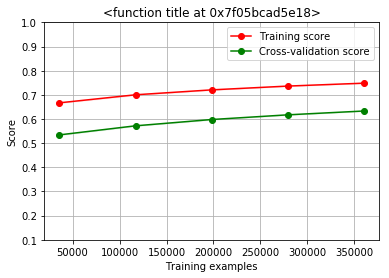

In [30]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)

estimator = KNeighborsClassifier()
plot_learning_curve(estimator, title, X_trainVal, Y_trainVal, ylim=(0.1, 1.00), cv=cv, n_jobs=4)


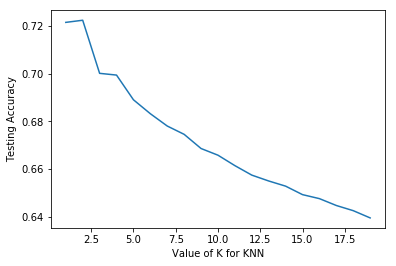

In [37]:

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')



In [40]:
knn = KNeighborsClassifier(n_neighbors=3,algorithm='auto')

# fitting the model
knn.fit(X_train1, Y_train1)

# predict the response
pred = knn.predict(X_test1)

# evaluate accuracy
acc = accuracy_score(Y_test1, pred) * 100
print('\nThe accuracy of the knn classifier for k = 3 is %d%%' % acc)


The accuracy of the knn classifier for k = 3 is 70%


In [41]:
print(pred)

[1 2 1 ..., 4 1 4]


In [ ]:
# creating odd list of K for KNN
from sklearn.cross_validation import cross_val_score
myList = list(range(0,20))
neighbors = list(filter(lambda x: x % 3 != 0, myList))


# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train1, Y_train1, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
distances

In [43]:

models= []
score_training= []
score_validation= []


d={'param1': { "priors": [0.2, 0.8] }}


print("Training accuracy of GaussianNB with different parameters")
for i in range(0,1,1):
    a = list(d.values())[i]
   
    clf = GaussianNB()
     
    clf.fit(X_train1, Y_train1)
    prediction = clf.predict(X_train1)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    models.append(i)
    score_training.append(accuracy_score(prediction, Y_train1))
    
    
print(models, "   ", score_training)


print("Validation accuracy of GaussianNB with different parameters")
for i in range(0,1,1):
    a = list(d.values())[i]

    clf = GaussianNB()
     
    clf.fit(X_trainVal, Y_trainVal)
    prediction = clf.predict(X_testVal)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    score_validation.append(accuracy_score(prediction, Y_testVal))
    
    
print(models, "   ", score_validation)


#measure_performance(features_train, labels_train, clf)

#matrix = confusion_matrix(labels_test, prediction)
#print(matrix)

#report = classification_report(labels_test, prediction)
#print(report)

#rms = mean_squared_error(labels_test, prediction)
#print("Root mean square error: ",rms)

Training accuracy of GaussianNB with different parameters
[0]     [0.8825925]
Validation accuracy of GaussianNB with different parameters
[0]     [0.88258000000000003]


In [44]:

models= []
score_training= []
score_validation= []


d={'param2': { "priors": [0.4, 0.6] }}


print("Training accuracy of GaussianNB with different parameters")
for i in range(0,1,1):
    a = list(d.values())[i]
   
    clf = GaussianNB()
     
    clf.fit(X_train1, Y_train1)
    prediction = clf.predict(X_train1)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    models.append(i)
    score_training.append(accuracy_score(prediction, Y_train1))
    
    
print(models, "   ", score_training)


print("Validation accuracy of GaussianNB with different parameters")
for i in range(0,1,1):
    a = list(d.values())[i]

    clf = GaussianNB()
     
    clf.fit(X_trainVal, Y_trainVal)
    prediction = clf.predict(X_testVal)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    score_validation.append(accuracy_score(prediction, Y_testVal))
    
    
print(models, "   ", score_validation)


#measure_performance(features_train, labels_train, clf)

#matrix = confusion_matrix(labels_test, prediction)
#print(matrix)

#report = classification_report(labels_test, prediction)
#print(report)

#rms = mean_squared_error(labels_test, prediction)
#print("Root mean square error: ",rms)

Training accuracy of GaussianNB with different parameters
[0]     [0.8825925]
Validation accuracy of GaussianNB with different parameters
[0]     [0.88258000000000003]


In [45]:

models= []
score_training= []
score_validation= []


d={'param2': { "priors": [0.4, 0.6] },
   'param3': { "priors": [0.5, 0.5] },
   'param4': { "priors": [0.6, 0.4] }, 
   'param5': { "priors": [0.8, 0.2] }}


print("Training accuracy of GaussianNB with different parameters")
for i in range(0,5,1):
    a = list(d.values())[i]
   
    clf = GaussianNB()
     
    clf.fit(X_train1, Y_train1)
    prediction = clf.predict(X_train1)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    models.append(i)
    score_training.append(accuracy_score(prediction, Y_train1))
    
    
print(models, "   ", score_training)


print("Validation accuracy of GaussianNB with different parameters")
for i in range(0,5,1):
    a = list(d.values())[i]

    clf = GaussianNB()
     
    clf.fit(X_trainVal, Y_trainVal)
    prediction = clf.predict(X_testVal)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    score_validation.append(accuracy_score(prediction, Y_testVal))
    
    
print(models, "   ", score_validation)


#measure_performance(features_train, labels_train, clf)

#matrix = confusion_matrix(labels_test, prediction)
#print(matrix)

#report = classification_report(labels_test, prediction)
#print(report)

#rms = mean_squared_error(labels_test, prediction)
#print("Root mean square error: ",rms)

Training accuracy of GaussianNB with different parameters


IndexError: list index out of range

In [ ]:
error_train = []
error_validation = []

for i in range(0,5,1):
    temp = 1 - score_training[i]
    error_train.append(temp)


for i in range(0,5,1):
    temp = 1 - score_validation[i]
    error_validation.append(temp)

In [ ]:
dat = pd.DataFrame(index=[1,2,3,4,5])

dat['training error'] = error_train 
dat['validation error'] = error_validation

dat.plot(title="Models Pereformance Graph")

### There was no variation in GuassianNB method when tuned with different parameters

In [ ]:
error_train

In [ ]:
error_validation

# 2. decision tree


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Different classification techniques
## Decision Tree 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree


In [ ]:
models= []
score_training= []
score_validation= []

In [ ]:
d={'param1': {"splitter": "random", "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 2},
   'param2': {"splitter": "random", "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 200},
   'param3': {"splitter": "random", "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 2},
   'param4': {"splitter": "random", "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 200},
   'param5': {"splitter": "best", "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 2},
   'param6': {"splitter": "best", "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 200},
   'param7': {"splitter": "best", "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 2},
   'param8': {"splitter": "best", "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 200},
   'param9':  {"splitter": "random", "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 2},
   'param10': {"splitter": "random", "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 200},
   'param11': {"splitter": "random", "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 2},
   'param12': {"splitter": "random", "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 200},
   'param13': {"splitter": "best", "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 2},
   'param14': {"splitter": "best", "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 200},
   'param15': {"splitter": "best", "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 2},
   'param16': {"splitter": "best", "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 200},
   'param17':  {"splitter": "best", "criterion":"entropy", "max_depth": 20},
   'param18':  {"splitter": "best", "criterion":"gini", "max_depth": 20},
   'param19':  {"splitter": "random", "criterion":"entropy", "max_depth": 200},
   'param20':  {"splitter": "random", "criterion":"gini", "max_depth": 200}}

In [ ]:
print("Training accuracy of Decision Tree with different parameters")
v = list(d.values())

for i in range(0,20,1):
    a = v[i]

    clf = tree.DecisionTreeClassifier(**a)
     
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_train)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    models.append(i)
    score_training.append(accuracy_score(prediction, Y_train))
    
    
print(models, "   ", score_training)


In [ ]:

print("Validation accuracy of Decision Tree with different parameters")
v = list(d.values())
for i in range(0,20,1):
    a = v[i]

    clf = tree.DecisionTreeClassifier(**a)
     
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    score_validation.append(accuracy_score(prediction, Y_test))
    
    
print(models, "   ", score_validation)


#measure_performance(features_train, labels_train, clf)

#matrix = confusion_matrix(labels_test, prediction)
#print(matrix)

#report = classification_report(labels_test, prediction)
#print(report)

#rms = mean_squared_error(labels_test, prediction)
#print("Root mean square error: ",rms)

In [ ]:
error_train = []
error_validation = []


for i in range(0,20,1):
    temp = 1 - score_training[i]
    error_train.append(temp)
    
print(error_train)
    
for i in range(0,20,1):
    temp = 1 - score_validation[i]
    error_validation.append(temp)
    
print(error_validation)

In [ ]:
C = [a - b for a, b in zip(error_validation, error_train)]
print(C)


m = min(i for i in C if i > 0)

print("Position:", C.index(m))
print("Value:", m)

In [ ]:
modelno = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [ ]:
dat = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
dat['model'] = modelno
dat['training error'] = error_train 
dat['validation error'] = error_validation

In [ ]:
dat.set_index("model",inplace=True)
dat.plot(title="Models Pereformance Graph")

### The best model which has least difference between training and validation error is model 12


# 3.random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree


In [ ]:
models= []
score_training= []
score_validation= []


d={'param1': {"n_estimators": 20, "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 2},
   'param2': {"n_estimators": 20, "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 200},
   'param3': {"n_estimators": 20, "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 2},
   'param4': {"n_estimators": 20, "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 200},
   'param5': {"n_estimators": 200, "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 2},
   'param6': {"n_estimators": 200, "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 200},
   'param7': {"n_estimators": 200, "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 2},
   'param8': {"n_estimators": 200, "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 200},
   'param9':  {"n_estimators": 20, "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 2},
   'param10': {"n_estimators": 20, "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 200},
   'param11': {"n_estimators": 20, "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 2},
   'param12': {"n_estimators": 20, "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 200},
   'param13': {"n_estimators": 200, "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 2},
   'param14': {"n_estimators": 200, "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 200},
   'param15': {"n_estimators": 200, "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 2},
   'param16': {"n_estimators": 200, "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 200}}


In [ ]:
print("Training accuracy of Random Forest Classifier with different parameters")
v = list(d.values())
for i in range(0,16,1):
    a = v[i]

    clf = RandomForestClassifier(**a)
     
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_train)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    models.append(i)
    score_training.append(accuracy_score(prediction, Y_train))
    
    
print(models, "   ", score_training)





In [ ]:
print("Validation accuracy of Random Forest Classifier with different parameters")
v = list(d.values())
for i in range(0,16,1):
    a = v[i]

    clf = RandomForestClassifier(**a)
     
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    score_validation.append(accuracy_score(prediction, Y_test))
    
    
print(models, "   ", score_validation)


# 4. logistic regression

In [ ]:
from sklearn import cross_validation
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
## Spliting of training dataset into 80% training data and 20% testing data randomly
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(x_new, y_new, test_size=0.2, random_state=42)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [ ]:

clf = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

clf.fit(features_train, labels_train)
prediction = clf.predict(features_test)
## Computing accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction, labels_test))

matrix = confusion_matrix(labels_test, prediction)
print(matrix)

rms = mean_squared_error(labels_test, prediction)
print("Root mean square error: ",rms)

report = classification_report(labels_test, prediction)
print(report)



# post processing

In [ ]:
train_users.query('outcome != 0')

In [ ]:
x_post=train_users[['correct','tag_string','answered_at_date']]

# models after post processing


# 1.decision tree

In [ ]:
from sklearn import cross_validation
## Spliting of training dataset into 80% training data and 20% testing data randomly
#features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = cross_validation.train_test_split(x_post, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Different classification techniques
## Decision Tree 
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import tree

models= []
score_training= []
score_validation= []

In [ ]:
d={'param1': {"splitter": "random", "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 2},
   'param2': {"splitter": "random", "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 200},
   'param3': {"splitter": "random", "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 2},
   'param4': {"splitter": "random", "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 200},
   'param5': {"splitter": "best", "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 2},
   'param6': {"splitter": "best", "criterion":"entropy", "max_depth": 20, "max_leaf_nodes": 200},
   'param7': {"splitter": "best", "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 2},
   'param8': {"splitter": "best", "criterion":"entropy", "max_depth": 200, "max_leaf_nodes": 200},
   'param9':  {"splitter": "random", "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 2},
   'param10': {"splitter": "random", "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 200},
   'param11': {"splitter": "random", "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 2},
   'param12': {"splitter": "random", "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 200},
   'param13': {"splitter": "best", "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 2},
   'param14': {"splitter": "best", "criterion":"gini", "max_depth": 20, "max_leaf_nodes": 200},
   'param15': {"splitter": "best", "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 2},
   'param16': {"splitter": "best", "criterion":"gini", "max_depth": 200, "max_leaf_nodes": 200},
   'param17':  {"splitter": "best", "criterion":"entropy", "max_depth": 20},
   'param18':  {"splitter": "best", "criterion":"gini", "max_depth": 20},
   'param19':  {"splitter": "random", "criterion":"entropy", "max_depth": 200},
   'param20':  {"splitter": "random", "criterion":"gini", "max_depth": 200}}

In [ ]:
print("Training accuracy of Decision Tree with different parameters")
v = list(d.values())

for i in range(0,20,1):
    a = v[i]

    clf = tree.DecisionTreeClassifier(**a)
     
    clf.fit(X_train2, Y_train2)
    prediction = clf.predict(X_train2)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    models.append(i)
    score_training.append(accuracy_score(prediction, Y_train2))
    
    
print(models, "   ", score_training)

In [ ]:

print("Validation accuracy of Decision Tree with different parameters")
v = list(d.values())
for i in range(0,20,1):
    a = v[i]

    clf = tree.DecisionTreeClassifier(**a)
     
    clf.fit(X_train, Y_train)
    prediction = clf.predict(X_test)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    score_validation.append(accuracy_score(prediction, Y_test))
    
    
print(models, "   ", score_validation)

In [ ]:
error_train = []
error_validation = []


for i in range(0,20,1):
    temp = 1 - score_training[i]
    error_train.append(temp)
    
print(error_train)
    
for i in range(0,20,1):
    temp = 1 - score_validation[i]
    error_validation.append(temp)
    
print(error_validation)

In [ ]:
C = [a - b for a, b in zip(error_validation, error_train)]
print(C)


m = min(i for i in C if i > 0)

print("Position:", C.index(m))
print("Value:", m)

In [ ]:
modelno = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
dat = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
dat['model'] = modelno
dat['training error'] = error_train 
dat['validation error'] = error_validation

dat.set_index("model",inplace=True)

In [ ]:
dat.plot(title="Models Pereformance Graph")

#  The best model which has least difference between training and validation error is model 4

# 2. GNB

In [ ]:

models= []
score_training= []
score_validation= []


d={'param1': { "priors": [0.2, 0.8] },
   'param2': { "priors": [0.4, 0.6] },
   'param3': { "priors": [0.5, 0.5] },
   'param4': { "priors": [0.6, 0.4] }, 
   'param5': { "priors": [0.8, 0.2] }}


print("Training accuracy of GaussianNB with different parameters")
for i in range(0,5,1):
    a = list(d.values())[i]
   
    clf = GaussianNB()
     
    clf.fit(X_train2, Y_train2)
    prediction = clf.predict(X_train2)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    models.append(i)
    score_training.append(accuracy_score(prediction, Y_train2))
    
    
print(models, "   ", score_training)


print("Validation accuracy of GaussianNB with different parameters")
for i in range(0,5,1):
    a = list(d.values())[i]

    clf = GaussianNB()
     
    clf.fit(X_train2, Y_train2)
    prediction = clf.predict(X_test2)
    ## Computing accuracy
    from sklearn.metrics import accuracy_score
        
    score_validation.append(accuracy_score(prediction, Y_test2))
    
    
print(models, "   ", score_validation)


#measure_performance(features_train, labels_train, clf)

#matrix = confusion_matrix(labels_test, prediction)
#print(matrix)

#report = classification_report(labels_test, prediction)
#print(report)

#rms = mean_squared_error(labels_test, prediction)
#print("Root mean square error: ",rms)

In [ ]:
error_train = []
error_validation = []

for i in range(0,5,1):
    temp = 1 - score_training[i]
    error_train.append(temp)


for i in range(0,5,1):
    temp = 1 - score_validation[i]
    error_validation.append(temp)

In [ ]:
dat = pd.DataFrame(index=[1,2,3,4,5])

dat['training error'] = error_train 
dat['validation error'] = error_validation

dat.plot(title="Models Pereformance Graph")

In [ ]:
error_train

In [ ]:
error_validation

## Logistic regression

In [ ]:

clf = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

clf.fit(X_train2, Y_train2)
prediction = clf.predict(X_test2)
## Computing accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(prediction, Y_test2))

matrix = confusion_matrix(Y_test2, prediction)
print(matrix)

rms = mean_squared_error(labels_test, prediction)
print("Root mean square error: ",rms)

report = classification_report(Y_test2, prediction)
print(report)

# Conclusion:


# Technique    Preprocessing------------------Post Preprocessing
# DTC               12:- 0.878873085680831------ 4:- 0.87927511271583692
# GNB               0.878873085680831------------0.878873085680831